In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("iris.csv", index_col=0)

In [45]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [65]:
df.reset_index(drop="Id", inplace=True)

In [25]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [39]:
df["Species"] = df.Species.str.split("Iris-").str[1]

In [67]:
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

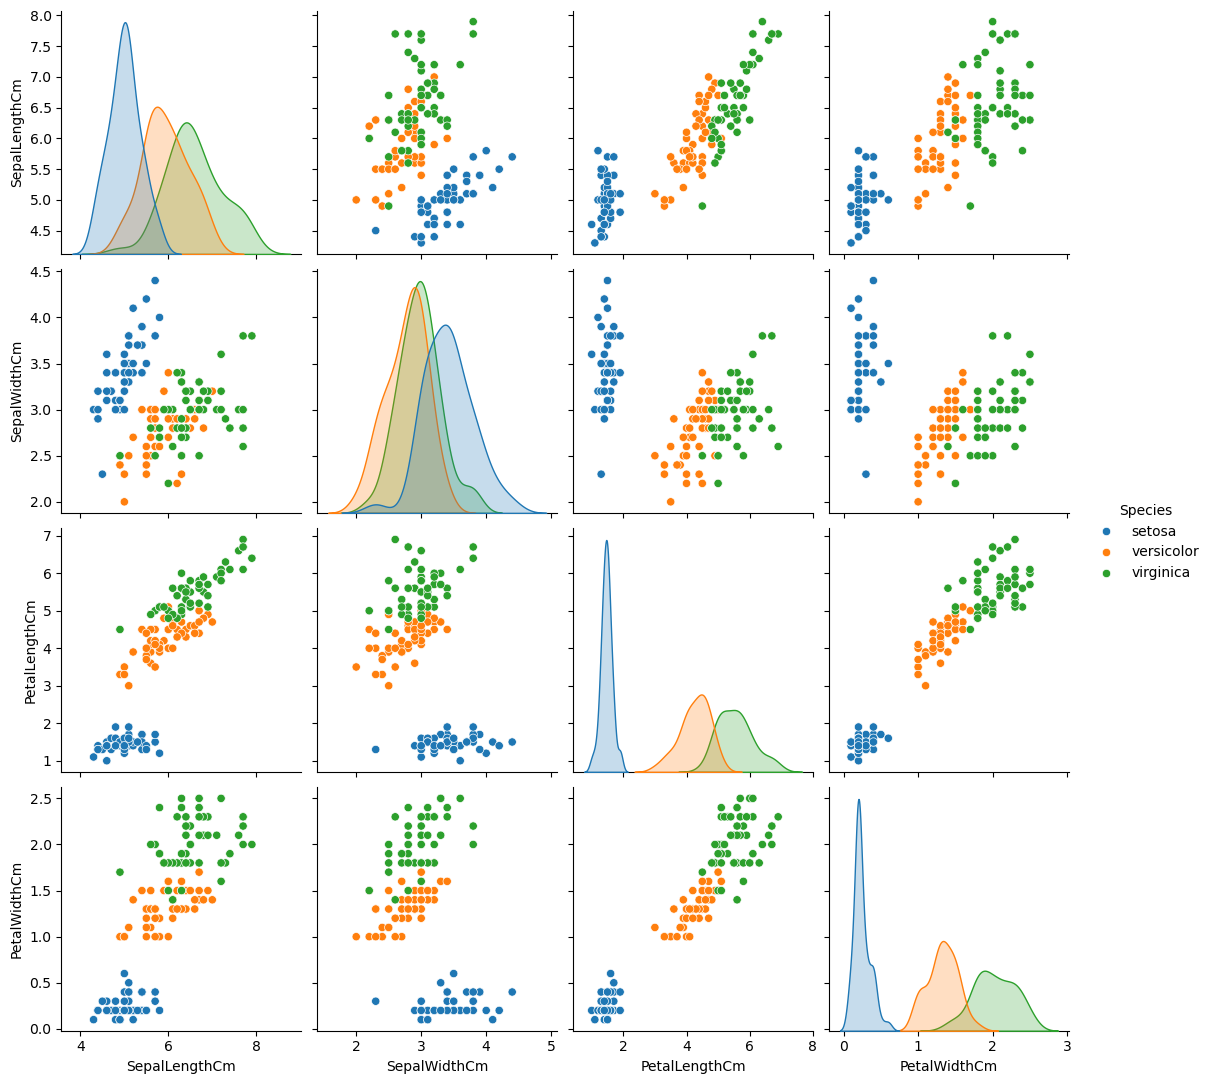

In [83]:
sns.pairplot(data=df, hue="Species", height=2.75)

In [85]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
df["Species_Num"] = df["Species"]

In [93]:
df["Species_Num"] = df["Species_Num"].map({"setosa": 1, "versicolor":2, "virginica": 3})

In [97]:
df.Species_Num.dtype

dtype('int64')

<Axes: >

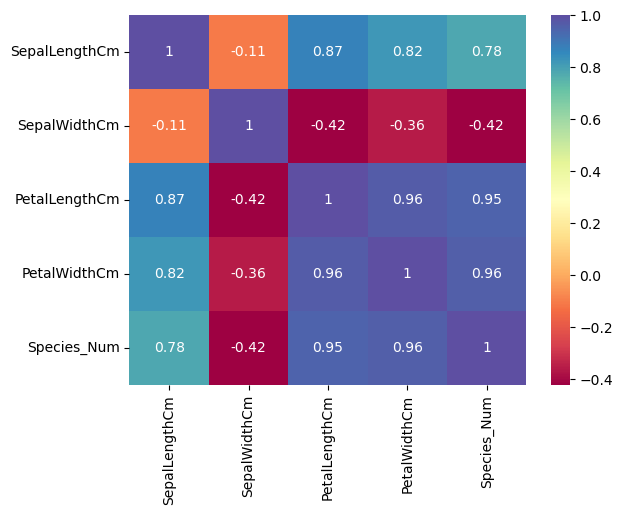

In [101]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Spectral")

In [105]:
df.drop(columns=["PetalLengthCm", "Species_Num"], inplace=True)

In [107]:
df

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa
...,...,...,...,...
145,6.7,3.0,2.3,virginica
146,6.3,2.5,1.9,virginica
147,6.5,3.0,2.0,virginica
148,6.2,3.4,2.3,virginica


In [109]:
X = df.drop(columns= "Species")

In [111]:
y = df["Species"]

In [113]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
Model = DecisionTreeClassifier()

In [127]:
Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
y_pred = Model.predict(X_test)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [137]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [139]:
from sklearn.model_selection import cross_val_score

In [141]:
cv_scores = cross_val_score(estimator = Model, X = X_train, y = y_train, cv = 10)

In [145]:
cv_scores.mean()

0.8825757575757575

In [147]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

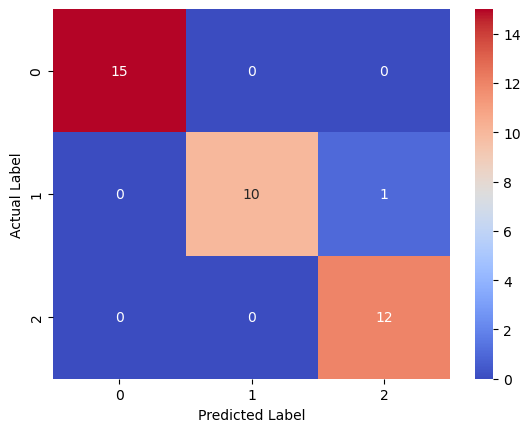

In [153]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap = "coolwarm")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [157]:
from sklearn import tree 

In [161]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica']


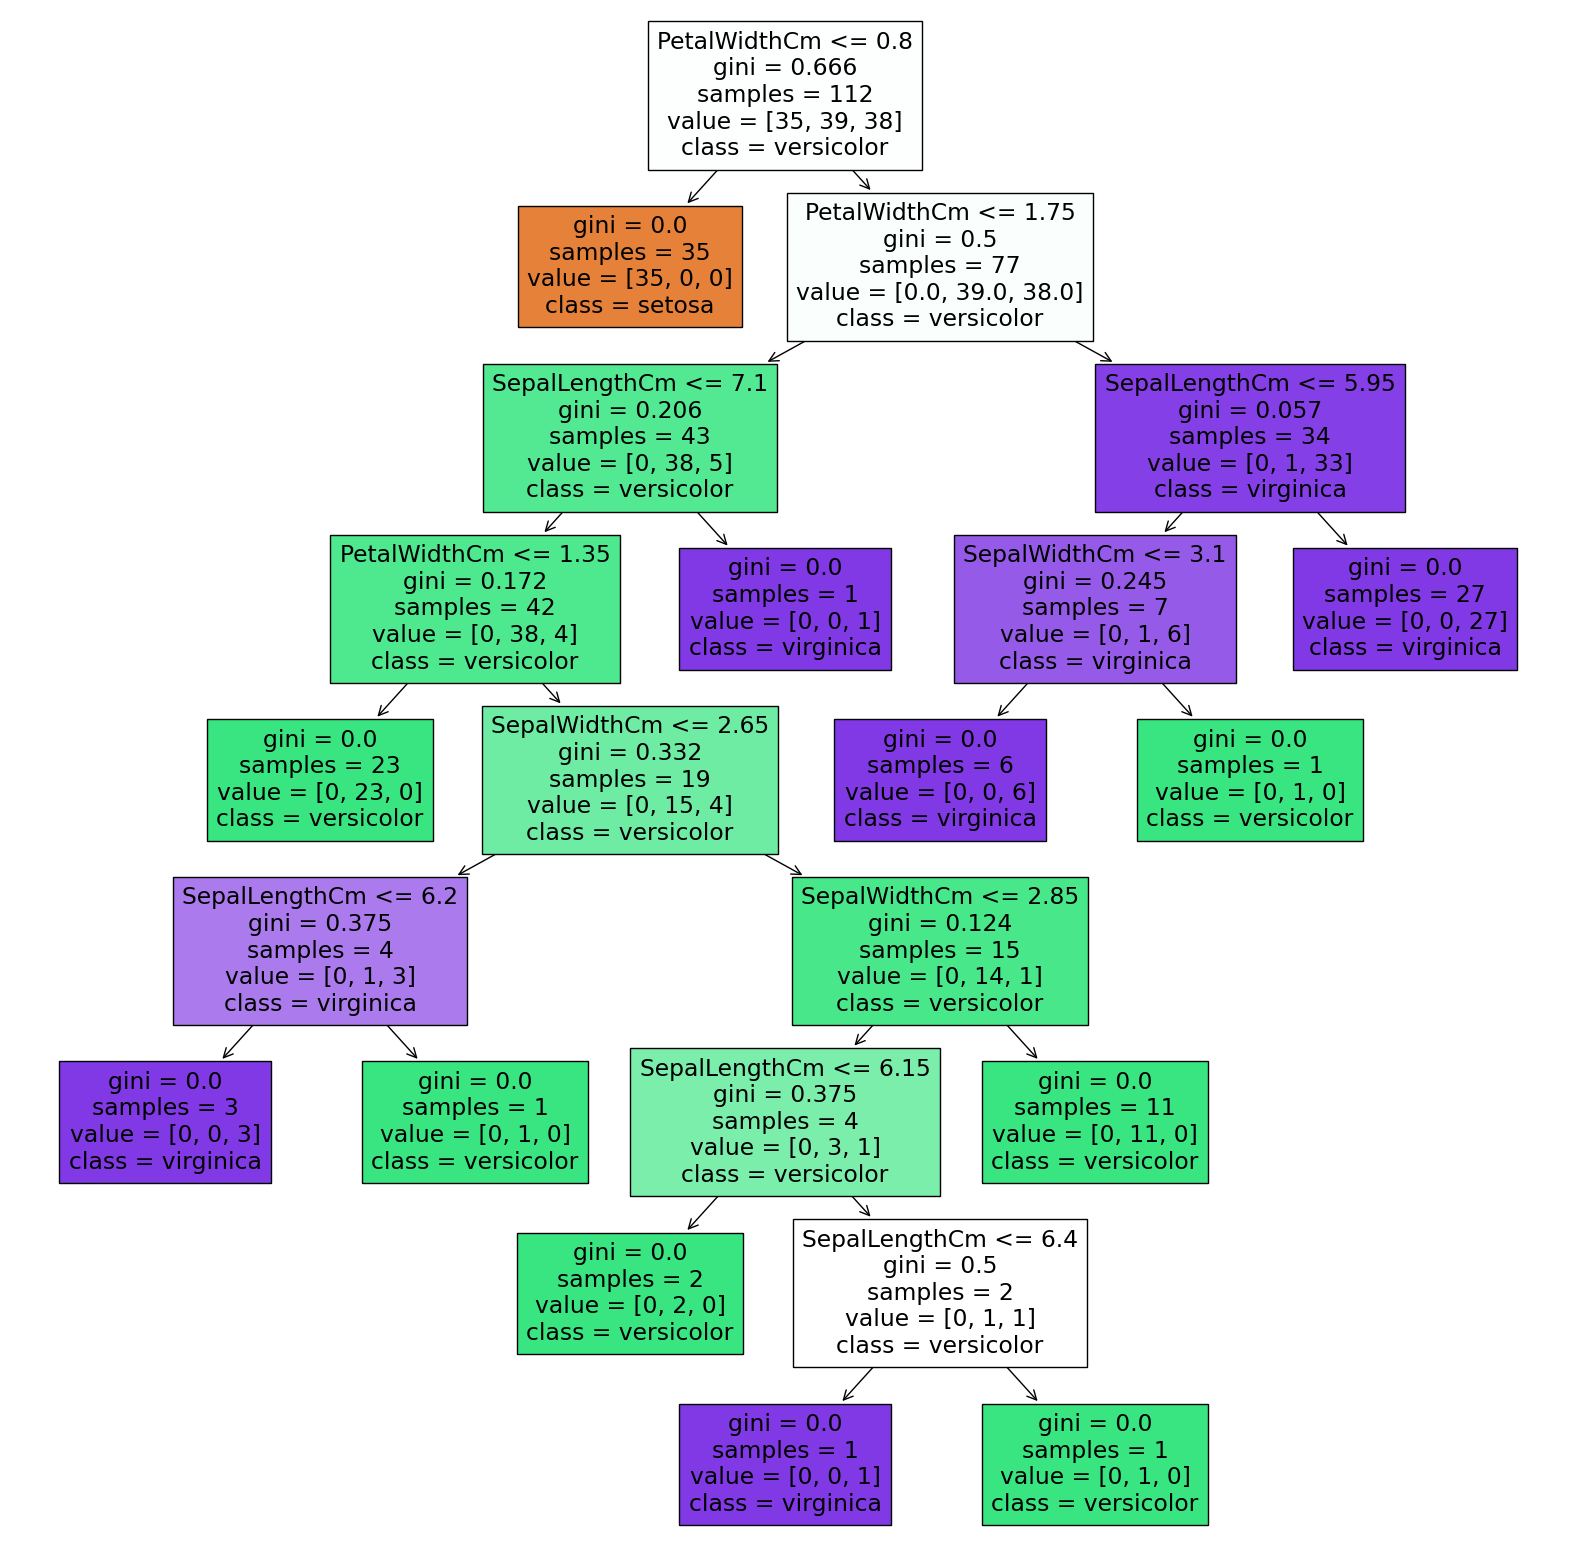

In [165]:
plt.figure(figsize=(20, 20))
tree2 = tree.plot_tree(Model, filled = True, feature_names=features, class_names = targets)

In [167]:
from sklearn.model_selection import GridSearchCV

In [169]:
Model_2 = DecisionTreeClassifier()

In [177]:
Model_2_params = {"criterion": ["gini", "entropy"],
                 "max_depth": np.arange(2, 14, 2),
                 "max_features":["auto", "sqrt", "log2"]}

In [179]:
Model_cv = GridSearchCV(estimator=Model_2, param_grid= Model_2_params, cv = 10)

In [181]:
Model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [185]:
Model_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

In [187]:
Model_3 = DecisionTreeClassifier(criterion = "gini", max_depth= 6, max_features= "sqrt")

In [189]:
Model_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [191]:
Model_3_y_pred = Model_3.predict(X_test)

In [193]:
Model_3_y_pred.

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa'], dtype=object)

In [195]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [197]:
cv_scores = cross_val_score(estimator = Model_3, X = X_train, y = y_train, cv = 10)

In [203]:
cv_scores.mean()

0.8734848484848484